<a href="https://colab.research.google.com/github/yuvrajrajput/machine-learning-with-me/blob/main/ML_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


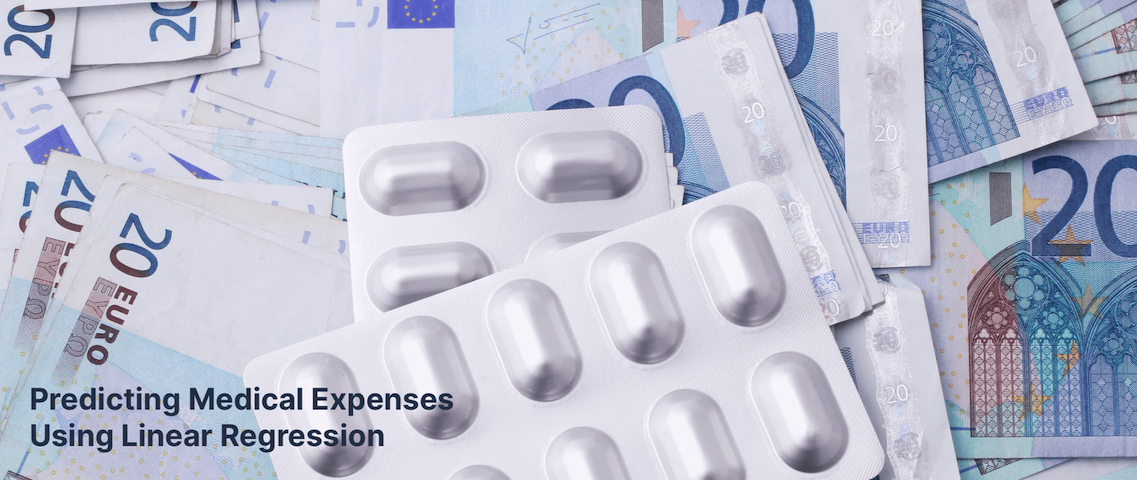



# **Problem Statement**
This tutorial takes a practical and coding-focused. We'll define the terms machine learning and linear regression in the context of a problem, and later generalize their definitions. We'll work through a typical machine learning problem step-by-step:

**QUESTION:** ACME Insurance Inc. offers affordable health insurance to thousands
of customer all over the United States. As the lead data scientist at ACME, **you're tasked with creating an automated system to estimate the annual medical expenditure for new customers**, using information such as their age, sex, BMI, children, smoking habits and region of residence.

Estimates from your system will be used to determine the annual insurance premium (amount paid every month) offered to the customer. Due to regulatory requirements, you must be able to explain why your system outputs a certain prediction

You're given a [CSV file](https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv) containing verified historical data, consisting of the aforementioned information and the actual medical charges incurred by over 1300 customers.

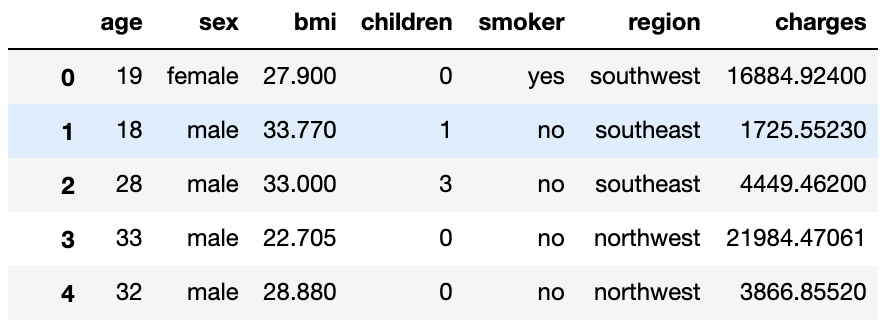

Dataset Link:

# **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
medical_df = pd.read_csv('/content/insurance.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


The dataset contains 1338 rows and 7 columns. Each row of the dataset contains information about one customer.


Our objective is to find a way to estimate the value in the "charges" column using the values in the other columns. If we can do so for the historical data, then we should able to estimate charges for new customers too, simply by asking for information like their age, sex, BMI, no. of children, smoking habits and region.

check the data type for each column.

In [3]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Check the duplicated value

In [4]:
duplicated_rows = medical_df.duplicated()
print(duplicated_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool


Here we find out our data is clean,  which doesn't require any data cleaning step.
Data Cleaning: **the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset**


Here are some statistics for the numerical columns:

In [5]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The ranges of values in the numerical columns seem reasonable too (no negative ages!), so we may not have to do much data cleaning or correction. The "charges" column seems to be significantly skewed however, as the median (50 percentile) is much lower than the maximum value.

# **Exploratory Analysis and Visualization**

Let's explore the data by visualizing the distribution of values in some columns of the dataset, and the relationships between "charges" and other columns.

We'll use libraries Matplotlib, Seaborn and Plotly for visualization

following settings will improve the default style and font sizes for our charts.

In [6]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

# **Age**

Age is a numeric column. The minimum age in the dataset is 18 and the maximum age is 64. Thus, we can visualize the distribution of age using a histogram with 47 bins (one for each year) and a box plot. We'll use plotly to make the chart interactive

In [7]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [8]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title = 'Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

The distribution of ages in the dataset is almost uniform, with 20-30 customers at every age, except for the ages 18 and 19, which seem to have over twice as many customers as other ages. The uniform distribution might arise from the fact that there isn't a big variation in the [number of people of any given age](https://www.statista.com/statistics/241488/population-of-the-us-by-sex-and-age/) (between 18 & 64) in the USA

Also one insight which we found here is The high number of 18 and 19-year-old insurance customers likely reflects a combination of factors, including the timing of legal adulthood, the beginning of independent living and financial responsibility, and the availability of insurance products designed for young adults. Insurance companies also perceive younger individuals as lower risk due to their generally better health and lower likelihood of needing frequent claims.

# **Body Mass Index**

 look at the distribution of BMI (Body Mass Index) of customers, using a histogram and box plot.

In [9]:
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

The measurements of body mass index seem to form a [Gaussian distribution ](https://en.wikipedia.org/wiki/Normal_distribution)centered around the value 30, with a few outliers towards the right. Here's how BMI values can be interpreted [source](https://study.com/academy/lesson/what-is-bmi-definition-formula-calculation.html):

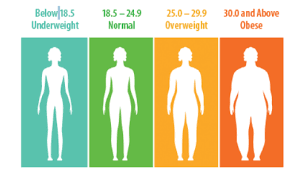

# **Charges**


Let's visualize the distribution of "charges" i.e. the annual medical charges for customers. This is the column we're trying to predict. Let's also use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.


In [11]:
fig = px.histogram(medical_df,
                   x="charges",
                   color="smoker",
                   marginal = 'box',
                   color_discrete_sequence = ['green' , 'grey'],
                   title="Charges Distribution")
fig.update_layout( bargap = 0.1)
fig.show()

We can make the following observations from the above graph:

For most customers, the annual medical charges are under \$10,000. Only a small fraction of customer have higher medical expenses, possibly due to accidents, major illnesses and genetic diseases. The distribution follows a "power law"
There is a significant difference in medical expenses between smokers and non-smokers. While the median for non-smokers is \
7300
,
t
h
e
m
e
d
i
a
n
f
o
r
s
m
o
k
e
r
s
i
s
c
l
o
s
e
t
o
7300,themedianforsmokersiscloseto
35,000.

In [12]:
fig = px.histogram(medical_df,
                   x="charges",
                   color="sex",
                   marginal = 'box',
                   color_discrete_sequence = ['green' , 'grey'],
                   title="Charges Distribution")
fig.update_layout( bargap = 0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df,
                   x="charges",
                   color="region",
                   marginal = 'box',
                   color_discrete_sequence = ['red' , 'yellow', 'Orange', 'Blue'],
                   title="Charges Distribution")
fig.update_layout( bargap = 0.1)
fig.show()